AGESS Python Workshop July 16th 2024
====================================

**Author:** Ulrich G. Wortmann



## This is a Jupyter Notebook - Welcome!



Jupyter Notebooks have three types of areas: 

1.  A text area like this. Text areas can be edited.
2.  A code area like the one below this list paragraph. Code areas can be edited and the code can be executed.
3.  A result area, which contains the output (if there is any) from a code area.

These areas are also called 'cells'. To execute this code cell, put your cursor over the cell, and click with your mouse. To execute the cell, press the \`shift\` and the \`enter\` keys at the same time.



In [1]:
2 + 2

To edit the code cell, put your cursor over the cell, and click with your mouse.  You can now edit the code. Try this now.

There is a lot more that we can do here, but this is enough for now.



## Python in 60 seconds



The power of programming stems from the ability to store and manipulate data. Data can be stored in so-called `variables` which then can be re-used (or modified). Consider the following code where we create the variable `year_to_sec`



In [1]:
year_to_sec = 60 * 60 * 24 * 365
print(year_to_sec)

However, variables can also store text. In Python, text has to be enclosed by quotation marks (also called a `string`)



In [1]:
message = "Hello World"
print(message)

A special type of string, the so-called f-strings allows us to mix letters and Python code. f-strings are preceded by the letter `f` and they can contain curly braces. Everything inside the curly braces is treated as Python code. If this makes no sense, just try the following:



In [1]:
print(f"Number of seconds in 5 years {year_to_sec * 5}")
print(f"Number of seconds in a month {year_to_sec / 12}")
print(f"Number of seconds 1000 years {year_to_sec * 1000}")

### Caveat Emptor



Python is very picky about indentation. The first line will work, and the second line will throw an error



In [1]:
1 + 1
 2 + 2

So make sure that your code always starts to the left.



## Organizing your data and importing it into Python



When you work with Excel, your data can be anywhere on the Excel sheet. To create plots with Python, it is best to have the data organized in such a way that the first row contains the column headers, and the remaining rows contain the data. It is also a good practice to not have empty rows between data rows, or empty columns between data columns.

Next, we need to make the data available to our Python program. Rather than writing our Python code to read and import data from a spreadsheet, we use a so-called "library" that will do the job for us. In the next code cell, we tell Python to use the `pandas` library and to create the `pd` nickname for `pandas`. Note, that you need to execute this code cell before you continue



In [1]:
import pandas as pd

Pandas stores the data it reads from a file into a so-called `dataframe` variable. Let's do a practical example where we call the data frame `df`, and the `head()` method which will display a shortened version of the data frame.



In [1]:
df = pd.read_csv("cars.csv")
df.head()

|   | License Plate | Make     | Type     | Color  |
|---+---------------+----------+----------+--------|
| 0 | BDAC8976      | Volvo    | V90      | black  |
| 1 | CFGD1345      | Jeep     | Cherokee | white  |
| 2 | AAHG9428      | Acura    | Infinity | green  |
| 3 | HHFL1234      | Mercedes | E400     | silver |

If we want to plot data. we usually need a specific column. There are many ways to extract data from a data frame, but this is the most intuitive one:



In [1]:
df["License Plate"]

0    BDAC8976
1    CFGD1345
2    AAHG9428
3    HHFL1234
Name: License Plate, dtype: object

## Time to make some plots!



Python has a variety of options to create graphs.  Today we will use the `pyplot` library that is part of the `matplotlib` library. The following code imports the necessary libraries reads some Excel data, and plots the data:



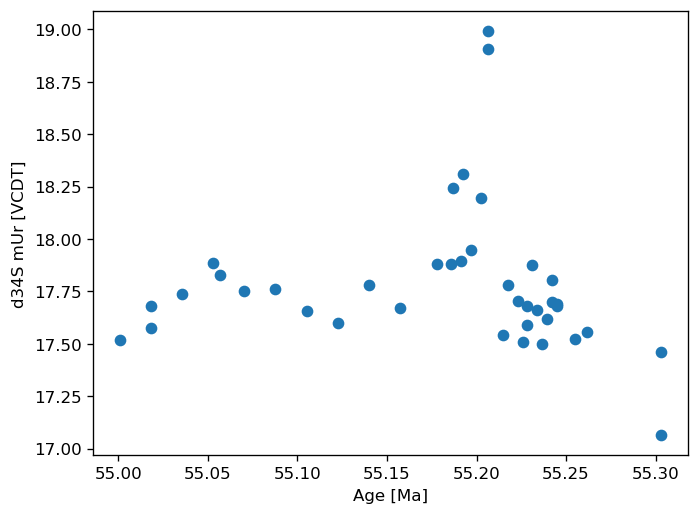

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fn: str = "Yao_2018.xlsx"  # file name
sn: str = "combined_data"  # sheet name

# create dataframe from excel file
df = pd.read_excel(fn, sheet_name=sn)

# extract the data from the dataframe
x = df["Age [Ma]"]
y = df["d34S"]

# define the axis labels
x_label = "Age [Ma]"
y_label = "d34S mUr [VCDT]"

# create the plot objects
fig, ax = plt.subplots()

# plot the data
ax.scatter(x, y)

# add the labels
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

# save the plot as pdf file
fig.savefig("test_plot.pdf")

# show the plot
plt.show()

A lot of typing, but not that hard. But a few explanations are in order.

-   The function `plt.subplots()` creates a plot object. More precisely, it creates at least one `figure` and one `axes` object. But this function can also generate a figure with multiple subplots, hence the name (see below).
-   The returned  `figure` and `axes` objects should really be named `canvas` and `figure`. Alas, everyone else calls them `fig` and `ax`. The `fig` object deals with the entire figure (canvas) which can hold more than one plot panel (`ax`). The `ax` object is specific to a given plot panel.
-   Rereading the code above, you can now see that we use the `ax` object to plot the actual data. In the above case, use the `scatter` function, since we are dealing with discrete data.
-   next, we use the `ax` object to set the axis labels, and then we save the figure. The figure format is determined by the filename extension.
-   Lastly, we display the figure. This is always the last step since rendering the figure can be computationally expensive. Note, that this step also deletes the figure.



## Why bother?



We could have made the above figure with much less effort using Excel. So why bother typing all those commands? 

-   Unlike Excel, you have full control over every aspect of the figure.
-   Once your figure becomes more complicated, working with Excel becomes difficult (think interrupted scales, multiple y-axes, etc.)
-   Much of the typing above is boilerplate, and we can use a figure template like this one, and cut/copy/paste becomes your friend. Simply remove the comment sign (#) to use any of the below options. Go ahead and play with this a bit.



In [1]:
fig, ax = plt.subplots()
ax.scatter(x, y, color="C0")
# ax.plot(x, y, color="C1")
# ax.set_xlim((0,1)) # set x-axis limits
# ax.set_ylim((0,1)) # set y-axis limits
# fig.set_size_inches(6, 4) # set image size 
# ax.set_title("My first plot") # set plot title 
# ax.set_xlabel("Age [Ma]") # set x-label
# ax.set_ylabel("$\delta^{34}$S [$^0/_{00}$ VCDT] ") 
# ax.legend(["Yao et al. 2018"], frameon=False) # include a legend
# ax.text(55, 18.75, "Some text") 
# ax.spines["right"].set_color("none") # remove visual clutter 
# ax.spines["top"].set_color("none")
# fig.tight_layout() # improve layout 
# fig.savefig("test_figure.pdf") # save figure
plt.show() # show figure